## Streprogen - Intermediate features

This notebook shows features of [streprogen](https://github.com/tommyod/streprogen), the Python strength program generator.

- [GitHub repository](https://github.com/tommyod/streprogen)
- [Python Package Index (PyPI)](https://pypi.org/project/streprogen/)
- [Report issues or make feature requests](https://github.com/tommyod/streprogen/issues)

Contributions to the code are welcome. :)

In [1]:
!pip install streprogen matplotlib --quiet --no-cache --upgrade

### Imports

In [2]:
import matplotlib.pyplot as plt
from streprogen import Program

### Examining default parameters

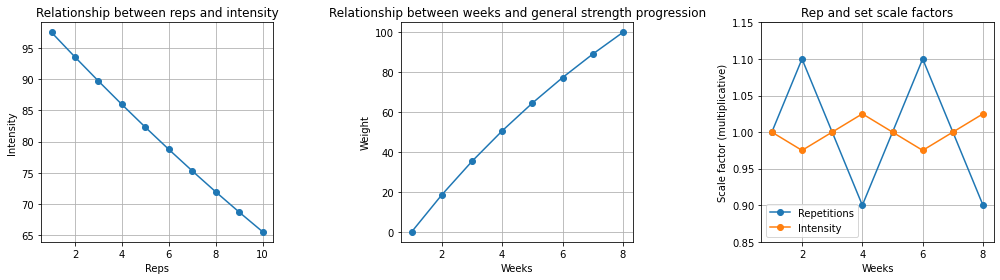

In [3]:
reps = list(range(1, 11))
weeks = list(range(1, 9))

plt.figure(figsize=(14, 4))

# ------------------------------------------------------
plt.subplot(1, 3, 1)
plt.title("Relationship between reps and intensity")
plt.plot(reps, Program._default_reps_to_intensity_func(reps), "-o")
plt.xlabel("Reps")
plt.ylabel("Intensity")
plt.grid()

# ------------------------------------------------------
plt.subplot(1, 3, 2)
plt.title("Relationship between weeks and general strength progression")
plt.plot(
    weeks,
    Program._default_progression_func(
        weeks, start_weight=0, final_weight=100, start_week=1, final_week=8
    ),
    "-o",
)
plt.xlabel("Weeks")
plt.ylabel("Weight")
plt.grid()

# ------------------------------------------------------
plt.subplot(1, 3, 3)
plt.title("Rep and set scale factors")
plt.plot(
    weeks,
    Program._default_rep_scaler_func(weeks, final_week=8),
    "-o",
    label="Repetitions",
)
plt.plot(
    weeks,
    Program._default_intensity_scaler_func(weeks, final_week=8),
    "-o",
    label="Intensity",
)
plt.legend()
plt.xlabel("Weeks")
plt.ylabel("Scale factor (multiplicative)")
plt.ylim([0.85, 1.15])
plt.grid()

plt.tight_layout()

### Custom function for the relationship between sets and intensity

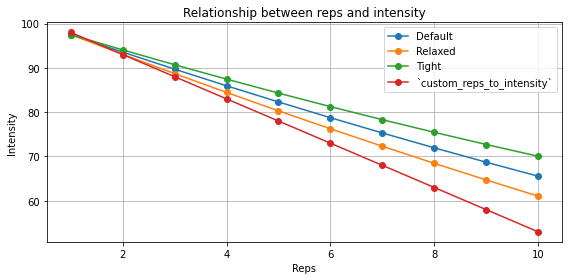

In [4]:
# These three functions are supplied for your convencience
from streprogen.modeling import (
    reps_to_intensity,
    reps_to_intensity_relaxed,
    reps_to_intensity_tight,
)


def custom_reps_to_intensity(reps):
    """Define your own custom relationship here"""
    return 98 - 5 * (reps - 1)


reps = list(range(1, 11))
plt.figure(figsize=(8, 4))

# ------------------------------------------------------
plt.title("Relationship between reps and intensity")
plt.plot(reps, reps_to_intensity(reps), "-o", label="Default")
plt.plot(reps, reps_to_intensity_relaxed(reps), "-o", label="Relaxed")
plt.plot(reps, reps_to_intensity_tight(reps), "-o", label="Tight")
plt.plot(
    reps,
    [custom_reps_to_intensity(r) for r in reps],
    "-o",
    label="`custom_reps_to_intensity`",
)
plt.xlabel("Reps")
plt.ylabel("Intensity")
plt.grid()
plt.legend()
plt.tight_layout()

### Program setup

In [5]:
program = Program(
    name="IntermediateFeatures",  # The name of the training program
    duration=4,  # The duration of the training program in weeks.
    reps_per_exercise=20,  # The baseline number of repetitions per dynamic exercise.
    units="kg",  # Units for the weights, typically 'kg', 'lbs' or '' (empty)
    round_to=2.5,  # What the weights are rounded to.
    # The intensity is the average % of 1RM that repetitions are performed at
    intensity=80,
    # The `reps_to_intensity_func` can be replaced with any function mapping from reps to intensity
    # Two non-defaults supplied are: reps_to_intensity_relaxed, reps_to_intensity_tight
    reps_to_intensity_func=custom_reps_to_intensity,
)


import random

random.seed(123)  # Seed the random number generator for reproducible results


def static_stomach(week):
    """A static function can return random strings."""
    return random.choice(["3 x 10", "4 x 8", "5 x 8"])


with program.Day("Monday"):
    # The intensity can be changed for a specific exercise
    program.DynamicExercise(
        name="Bench", start_weight=80, min_reps=1, max_reps=6, intensity=82
    )

    program.DynamicExercise(name="Squats", start_weight=100, min_reps=3, max_reps=8)
    program.StaticExercise("Curls", "3 x 12")

with program.Day("Wednesday"):
    program.DynamicExercise(name="Deadlifts", start_weight=100, percent_inc_per_week=2)
    program.DynamicExercise(name="Squats", start_weight=90, final_weight=100)

with program.Day("Friday"):

    program.DynamicExercise(name="Deadlifts", start_weight=100, reps=15)
    program.DynamicExercise(name="Curls", start_weight=30, round_to=2)

    # Instead of passing a string, we can pass a function
    # that takes a week number and returns a string
    program.StaticExercise("Stomach", static_stomach)

### Render the program

In [6]:
# Do the computations and render a program. Might take a few seconds.
program.render()

### Print and save the program

In [7]:
print(program)

----------------------------------------------------------------
Program: IntermediateFeatures

Program parameters
  duration: 4
  reps_per_exercise: 20
  intensity: 80
  units: kg
----------------------------------------------------------------
Exercise information
  Monday
   Bench        80kg -> 84.8kg 
    reps: [1, 6]   weekly inc.: 1.5%
   Squats      100kg -> 106.0kg
    reps: [3, 8]   weekly inc.: 1.5%
   Curls       3 x 12
  Wednesday
   Deadlifts   100kg -> 108.0kg
    reps: [3, 8]   weekly inc.: 2.0%
   Squats       90kg -> 100kg  
    reps: [3, 8]   weekly inc.: 2.8%
  Friday
   Deadlifts   100kg -> 106.0kg
    reps: [3, 8]   weekly inc.: 1.5%
   Curls        30kg -> 31.8kg 
    reps: [3, 8]   weekly inc.: 1.5%
   Stomach     3 x 10
----------------------------------------------------------------
Program
 Week 1
  Monday
   Bench       5 x 62.5kg  5 x 62.5kg  4 x 67.5kg  3 x 70kg    3 x 70kg    
   Squats      6 x 72.5kg  5 x 77.5kg  4 x 82.5kg  3 x 87.5kg  3 x 87.5kg  
   

### Export the program as `.html` or `.tex`, then to `.pdf`

A `.html` file can be printed directly from your browser, or printed to a `.pdf` from your browser.

In [8]:
# Save the program as a HTML file
with open("IntermediateFeatures.html", "w", encoding="utf-8") as file:
    # Control table width (number of sets) by passing the 'table_width' argument
    file.write(program.to_html(table_width=6))

Use a `.tex` to generate `.pdf` if you have LaTEX installed, or use:
    
- [latexbase.com](https://latexbase.com/) from your browser.

In [9]:
# If you have LaTeX installed on your system, you can render a program to .tex
# Alternatively, you can paste the LaTeX into: https://latexbase.com/

print(program.to_tex(table_width=6))

% -----------------------------------------------
% Package imports
% -----------------------------------------------
\documentclass[12pt, a4paper]{article}% 'twoside' for printing
\usepackage[utf8]{inputenc}% Allow input to be UTF-8
\usepackage[margin = 2cm]{geometry}% May be used to set margins

% -----------------------------------------------
% Document start
% -----------------------------------------------

\begin{document}
\large

\section*{Program: IntermediateFeatures}

This program was made using \verb|streprogen|,
the Python strength program generator.
The latest version can be found at \\
\verb|https://pypi.python.org/pypi/streprogen/|.


\section*{Program parameters}
\begin{tabular}{l|l}
	\textbf{Parameter} & \textbf{Value} \\ \hline
	\verb|duration|             & 4 \\
	\verb|reps_per_exercise|    & 20 \\
	\verb|intensity|            & 80 \\
	\verb|units|                & kg
\end{tabular}


\section*{Exercise information}
\begin{tabular}{llllll}
    \textbf{Exercise} & \te